In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
from sklearn.preprocessing import normalize as N
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [26]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [27]:
dataframe = pd.read_csv('Data/bike_sharing.csv')

In [28]:
dataframe.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
dataframe  = dataframe[['registered','cnt']]

In [30]:
dataframe = dataframe.rename(columns={'registered':'x','cnt':'y'})

In [31]:
dataframe.isna().sum()

x    0
y    0
dtype: int64

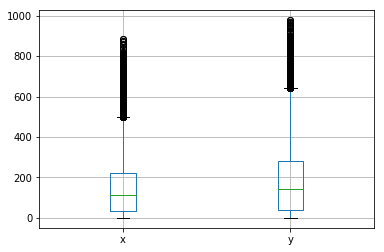

In [32]:
dataframe.boxplot()

In [33]:
dataframe.shape

(17379, 2)

In [34]:
dataframe = preprocess_obj.remove_outlier(dataframe)

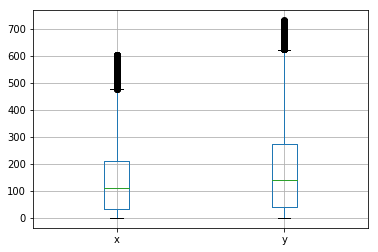

In [35]:
dataframe.boxplot()

In [36]:
dataframe.shape

(17379, 2)

In [37]:
dataframe= dataframe.dropna()

In [38]:
dataframe.shape

(16999, 2)

In [39]:
preprocess_obj.duplicates_count(dataframe)

6887

In [40]:
dataframe = preprocess_obj.remove_Duplicates(dataframe)

In [41]:
dataframe.shape

(10112, 2)

Polynomial Regression


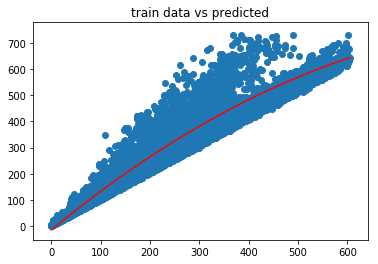

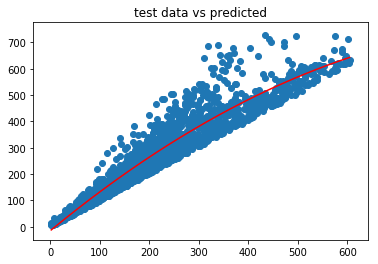

Accuracy using r2 score is -219912.80008329218 %
mae: 32.77307629538005, mse: 2200.1280008329218, r2 score: 0.8972947047606706


In [42]:
class polynomial_Regression:
    
    def __init__(self):
        self.degree = 2
        print("Polynomial Regression")
        
    def plotter(self,X,Y,lin_reg,poly_reg,plot_title):
        # smoothening the plot so that we can see a smooth curve so getting points with difference 0.1
        X_smooth = np.arange(X.min(),X.max(),0.1)
        plt.title(plot_title)
        plt.plot(X_smooth,lin_reg.predict(poly_reg.fit_transform(X_smooth.reshape(-1,1))),color='r')
        plt.scatter(X,Y)
        plt.show()
    
    def polynomial_Regression_demo(self,dataframe):
        # creating Linear regression object
        lin_reg = LinearRegression(normalize=True)
        # creating Poynomial Feature regression object with degree
        # degree tells till which power of x you need values eg. x^3 or x^4
        poly_reg = PolynomialFeatures(degree=self.degree)
        # Splitting independent variables and the output variables
        train_data = dataframe['x'].values
        train_Y = dataframe['y'].values
        # spilling train and test data
        train_data, test_data, train_Y, test_Y = train_test_split(train_data,train_Y, test_size=0.2,random_state=0)
        # geting the values of x till the degree provided
        train_poly = poly_reg.fit_transform(train_data.reshape(-1,1))
        # fitting linear regression model
        lin_reg.fit(train_poly,train_Y)
        # predicting the values on basis of our input data
        Ypred = lin_reg.predict(poly_reg.fit_transform(test_data.reshape(-1,1)))
        lin_reg.fit(train_poly,train_Y)
        Ypred = lin_reg.predict(poly_reg.fit_transform(test_data.reshape(-1,1)))
        r_score = r2_score(Ypred,test_Y)
        error_mae = mean_absolute_error(Ypred,test_Y)
        error_rmse = mean_squared_error(Ypred,test_Y)
        accuracy = (1-error_rmse)*100
        self.plotter(train_data,train_Y,lin_reg,poly_reg,'train data vs predicted')
        self.plotter(test_data,test_Y,lin_reg,poly_reg,'test data vs predicted')
        print("Accuracy using r2 score is {} %".format(accuracy))
        print("mae: {}, mse: {}, r2 score: {}".format(error_mae,error_rmse,r_score))
        
    def main(self,dataframe):
#         try:
        self.polynomial_Regression_demo(dataframe)
#         except Exception as e:
#             print("Process stopped because ",e)

if __name__ == '__main__':
    poly_class_obj = polynomial_Regression()
    poly_class_obj.main(dataframe)